# Исследовательский анализ заведений общественного питания Москвы

## Цель и задачи  

**Цель:** Провести исследовательский анализ заведений общественного питания Москвы с целью поиска подходящего места для потенциального открытия.   

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы и рекомендации по проведённому анализу.


## Данные

Для анализа поступили данные о клиентах банка «Метанпром». Данные состоят из двух датасетов:

- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` —  информация о среднем чеке в заведениях общественного питания.

### Описание датасета `rest_info`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение;
- `category` — категория заведения;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах;
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;
- `seats` — количество посадочных мест.

### Описание датасета `rest_price`

- `price` — категория цен в заведении;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино».


## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.


## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn. Данные датасетов сохраним в двух переменных: `info_df` и `price_df`.

In [148]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
from phik import phik_matrix

In [150]:
# Выгружаем данные в переменные bank_df и clients_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [152]:
# Выводим первые строки датафрейма на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [153]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Большинство столбцов представлены типом данных `object`. Значения в столбцах `rating` и `seats` хранятся в типах данных `float64`, столбца `chain` - в цельночисленном типе `int64`. Мы можем оптимизировать размерность данных в столбце `chain`, поскольку он представлен всего двумя значениями: 1 либо 0.
- Пропуски содержатся в столбцах `hours` и `seats`.
- Названия столбцов указаны единообразно, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [155]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [156]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о клиентах банка. При первом взгляде на датасет можно отметить следующее:
- Типы данных соответствуют содержимому.
- Практически во всех столбцах встречаются пропуски, наибольшее количество пропусков имеет столбец `middle_coffee_cup`. 
- Значения в столбцах соответствуют описанию, названия столбцов указаны единообразно.

---

## 2. Предобработка данных

Перед началом предобработки объединим два датафрейма в один.


In [159]:
df = info_df.merge(price_df, on='id', how='left')
display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


### 2.1 Изучаем корректность типов данных

Проведем оптимизацию цельночисленных данных и данных с плавающей точкой

In [161]:
# Оптимизируем цельночисленный тип данных в датафрейме df
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
df['rating'] = pd.to_numeric(df['rating'], downcast='float')
df['seats'] = pd.to_numeric(df['seats'], downcast='float')
df['middle_avg_bill'] = pd.to_numeric(df['middle_avg_bill'], downcast='float')
df['middle_coffee_cup'] = pd.to_numeric(df['middle_coffee_cup'], downcast='float')

In [162]:
# Проверим типы данных в датафрейме df с помощью атрибута dtypes
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                float32
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

### 2.2 Изучаем пропущенные значения в данных

При первичном анализе мы обнаружили пропуски в столбцах датафреймов. Узнаем абсолютное и относительное количество пропусков и проведем обработку в зависимости от характера и объема пропущенных данных.

In [164]:
# Применяем метод isna() к датафрейму df
df.isna().sum().sort_values()

id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
hours                 536
seats                3611
avg_bill             4590
price                5091
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [165]:
# Подсчитываем долю строк с пропусками
df.isna().mean().sort_values()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
hours                0.063764
seats                0.429574
avg_bill             0.546039
price                0.605639
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

В датафрейме `df` обнаружено 3611 пропусков в столбце `seats` — это 42,9% данных, 4590 пропусков в столбце `avg_bill` — 62,5% данных, 5091 пропусков в столбце `price` — 60,5% данных и 7871 пропусков в столбце `middle_coffee_cup` — 93,6% данных. Это очень большое количество пропусков, поэтому удалить эти данные нельзя. Замена такого количества пропусков также может исказить данные.

#### Пропуски в этих столбцах могут быть вызваны тем, что:
- Не все рестораны из датасета `rest_info` были проанализированы в рамках сбора данных, попавших в датасет `rest_price`.
- Сбой при обработке данных.

### 2.3 Проверяем данные на наличие дубликатов
Проверим данные на наличие явных и неявных дубликатов. Для начала выведем общее количество строк до обработки и посчитаем полные дубликаты:

In [168]:
# Посчитаем общее поличество строк до обработки дубликатов
total_rows = len(df)
print(f'Общее количество строк: {total_rows}')

Общее количество строк: 8406


In [169]:
# Проверяем полные дубликаты
df.duplicated().sum()

0

In [170]:
# Проверим дубликаты в столбцах name и address, приведя написание к единообразию 
df['id'] = df['id'].str.lower().str.strip()
df['name'] = df['name'].str.lower().str.strip()
df['address'] = df['address'].str.lower().str.strip()
df_sorted = df.sort_values(by=list(df.columns))
df = df.drop_duplicates(subset=['name', 'address'], keep='first', inplace=False)
display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


Таким образом, было обнаружено 4 строки с дубликатами, которые были удалены.

### 2.4 Выделим дополнительные столбцы
Создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7. В нем будут использоваться два вида значений: `1` либо `0`.

In [173]:
df['is_24_7'] = df['hours'].str.contains('ежедневно, круглосуточно', na=False)
# Вывод результата
display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN,True


На этапе предобработки мы увидели, что исследуемые данные достаточно объемны для проведения анализа. Типы данных в целом указаны корректно, мало встречающихся пропусков в основных столбцах, а также мало дубликатов. Проведенные корректировки, а также добавление нового столбца должны помочь сделать предстоящий анализ более точным.

## 3. Исследовательский анализ данных

### 3.1 Какие категории заведений представлены в данных? 
Исследуем количество объектов общественного питания по каждой категории. Результат сопроводим подходящей визуализацией.

In [177]:
# Проверяем распределение данных по значениям столбца category
print('Распределение данных по значениям столбца category:')
df['category'].value_counts()

Распределение данных по значениям столбца category:


category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

Для визуального анализа такого распределения используем столбчатую диаграмму. Визуализируем распределение в столбце category:

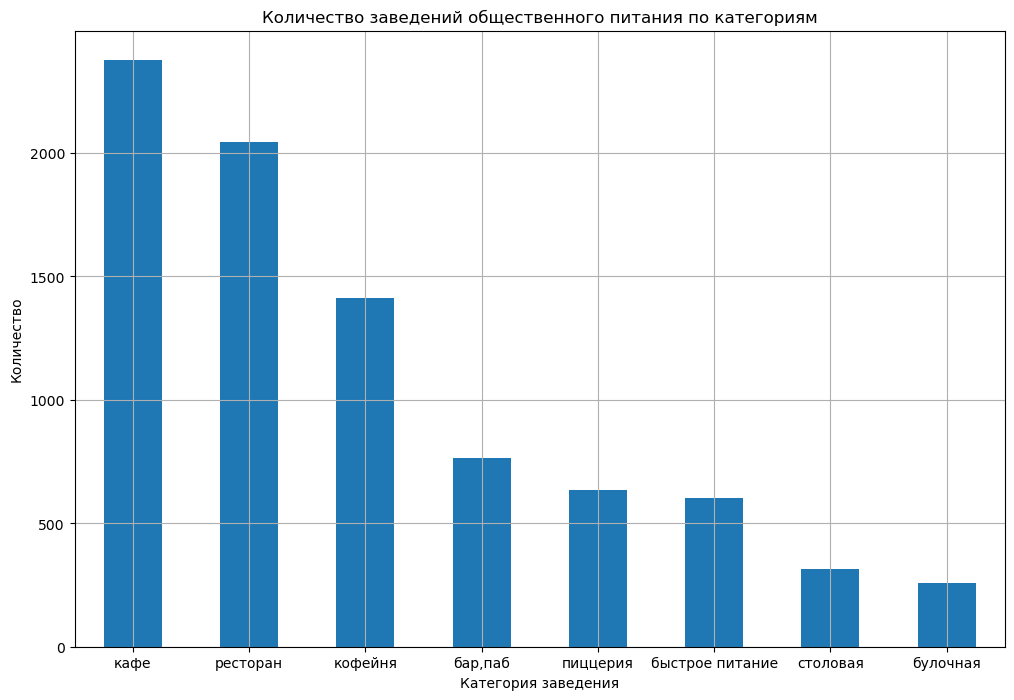

In [179]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений общественного питания по категориям'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На данной визуализации можно увидеть, что с большим отрывом идут кафе и рестораны: свыше двух тысяч заведений в каждой из этих категорий. Наименьшим количеством заведений выделяются столовые и булочные.

### 3.2 Какие административные районы Москвы присутствуют в данных? 
Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводим подходящими визуализациями.

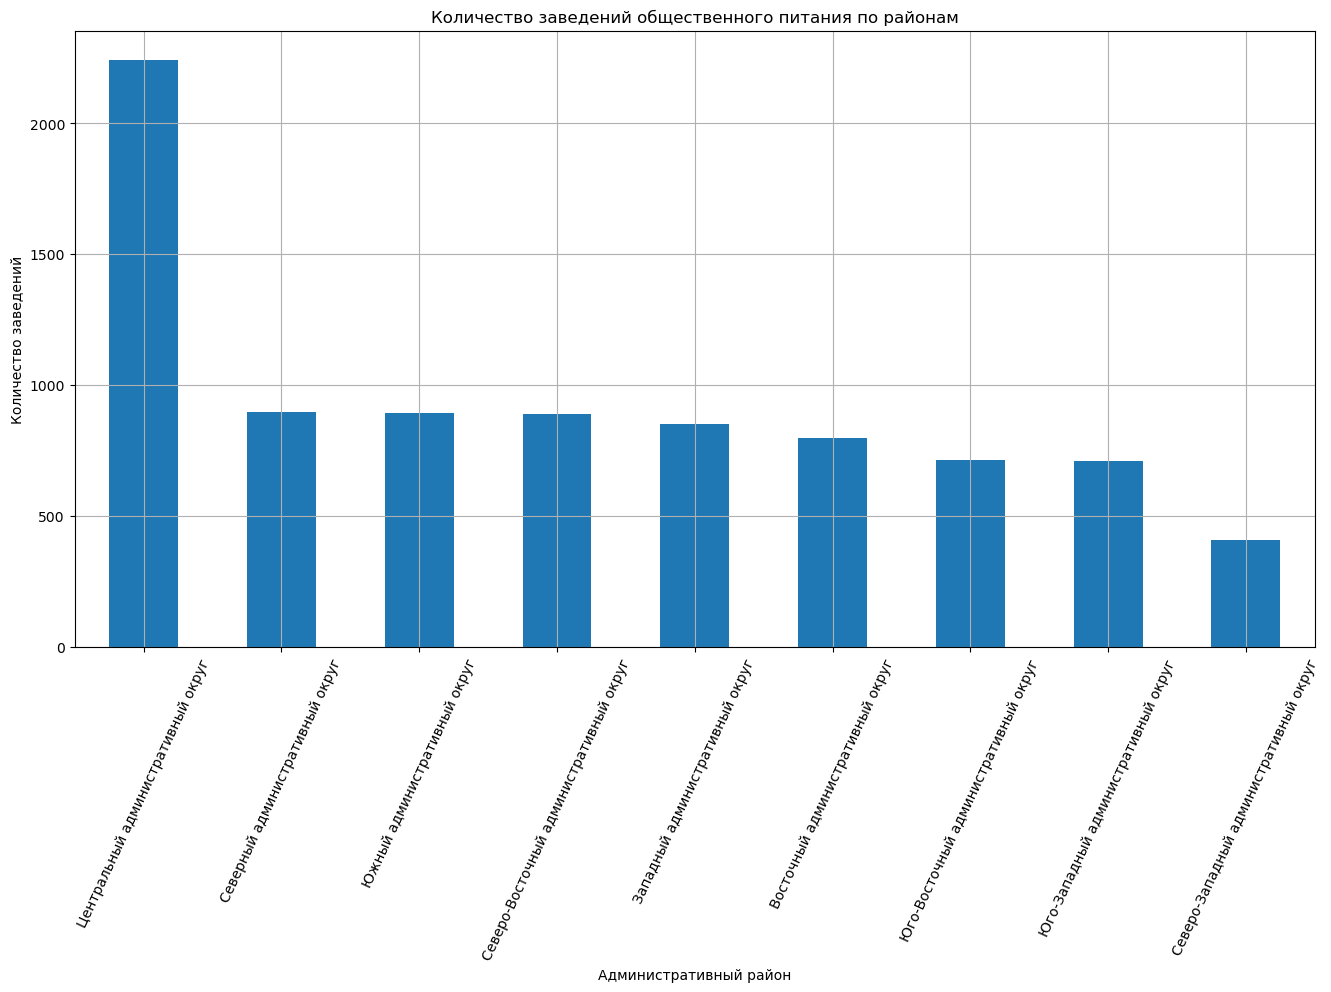

In [182]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=65, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений общественного питания по районам'
)

# Настраиваем оформление графика
plt.xlabel('Административный район')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Лидером по данному критерию является Центральный административный округ: количество заведений в 2-3 раза превышает количество в других районах. Отметим, что остальные районы показывают примерно равное количество точек. Выделяется лишь Северо-Западный административный округ - самое малое количество заведений среди всех районов Москвы.

Теперь посмотрим на распределение каждой категории в Центральном административном округе:

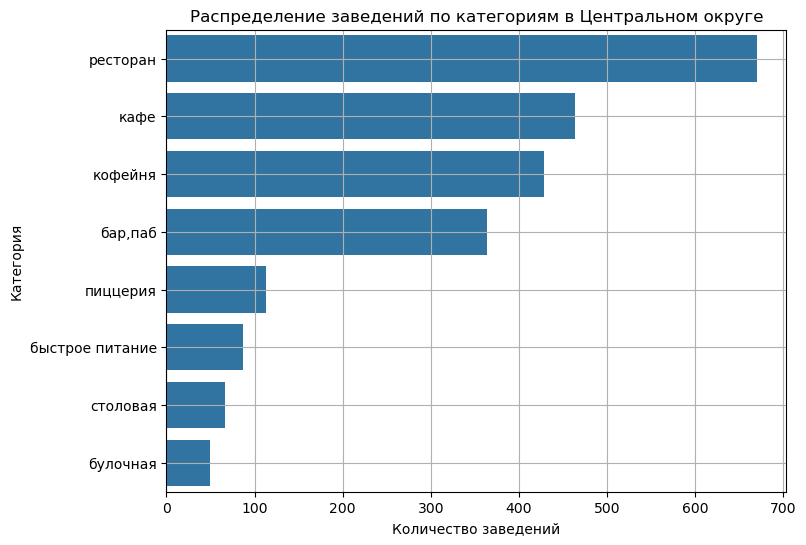

In [184]:
# Фильтруем данные
df_central = df[df['district'] == 'Центральный административный округ']

# Создаём контейнер графика и задаём размер
plt.figure(figsize=(8, 6))

# Строим столбчатую диаграмму категорий в ЦАО
sns.countplot(y=df_central['category'], order=df_central['category'].value_counts().index)

# Настройки графика
plt.title('Распределение заведений по категориям в Центральном округе')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
plt.grid()

# Отображаем график
plt.show()

Распределение в целом схоже с распределением по всей Москве. Отличием является заметно увеличившаяся доля заведений в категории "бар, паб".

### Изучаем соотношение сетевых и несетевых заведений

Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Построим визуализации.

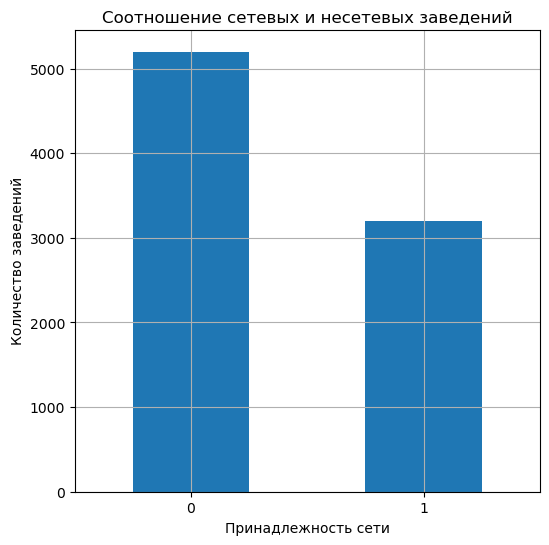

In [187]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(6, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['chain'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Соотношение сетевых и несетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Принадлежность сети')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Таким образом, несетевых заведений оказалось в 1,5 раза больше.

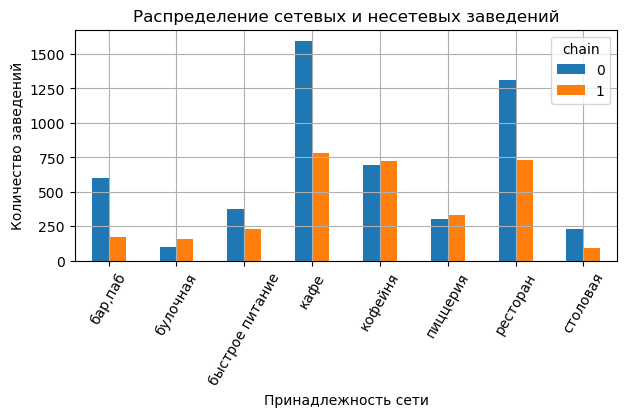

In [189]:
# Построим график столбчатой диаграммы
grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar',
               title=f'Распределение сетевых и несетевых заведений',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Принадлежность сети',
               rot=60,
               figsize=(7, 3))
plt.grid()

# Выводим график
plt.show()

Распределение в абсолютных цифрах отражает общую тенденцию - лидерами по количеству заведения являются кафе и рестораны. Однако посмотрим на соотношение в долях.

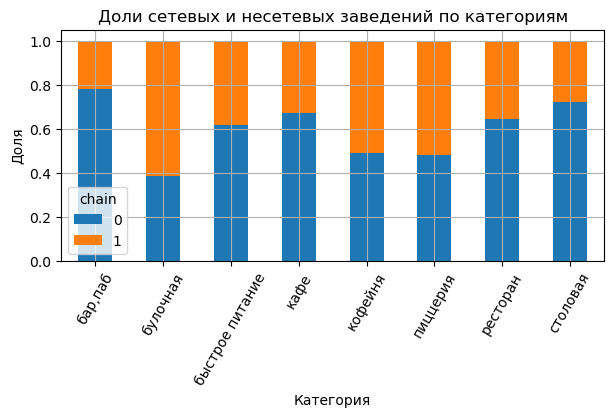

In [191]:
# Рассчитываем доли
grouped_ratio = grouped.div(grouped.sum(axis=1), axis=0) 

# Строим график долей
grouped_ratio.plot(kind='bar',
                   stacked=True,
                   title='Доли сетевых и несетевых заведений по категориям',
                   legend=True,
                   ylabel='Доля',
                   xlabel='Категория',
                   rot=60,
                   figsize=(7, 3))

plt.grid()
plt.show()

Сравнив распределение сетевых и несетевых заведений по категориям, можно сделать вывод, что сетевыми заведениями чаще являются `булочные` (более 60%), примерно равное распределение у `кофеен` и `пиццерий`, а меньше всего сетевых заведений (около 20%) находится в категории `бар, паб`.

### 3.4 Исследуем количество посадочных мест

Проверим данных на аномальные значения или выбросы. Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест.

In [194]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца seats:')
df['seats'].describe()

Статистические показатели столбца seats:


count    4792.000000
mean      108.361435
std       122.841225
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

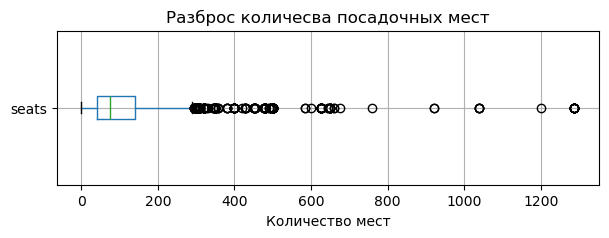

In [195]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Разброс количесва посадочных мест')
plt.xlabel('Количество мест')

# Выводим график
plt.show()

Распределение количества мест асимметричное, скошенное влево. Минимальное значение - 0 мест, а максимальное - 1288, что может быть названо выбросом. Среднее значение соответствует. Среднее (108) и медианное (122) значение достаточно близки. По гистограмме размаха видно, что значения выше 700 можно считать выбросами.

При анализе данных отфильтруем данные по 95 перцентилю и уберем нулевые значения:

In [197]:
percentile_95 = df['seats'].quantile(0.95)
df_filtered = df[(df['seats'] > 0) & (df['seats'] <= percentile_95)]

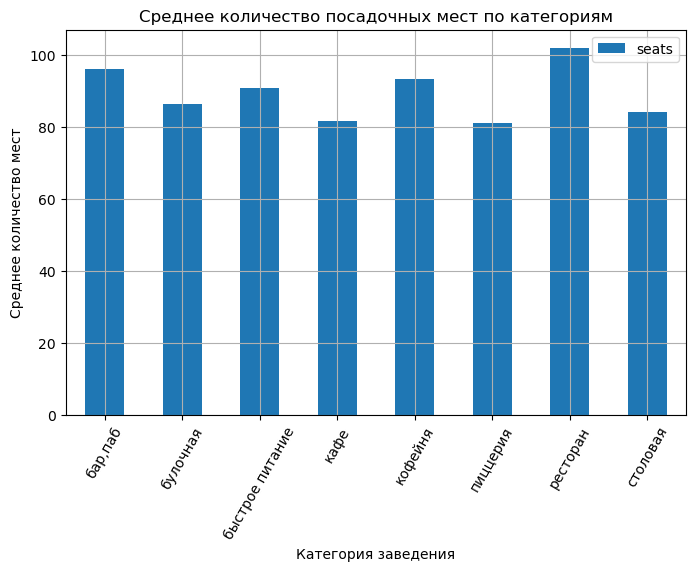

In [198]:
avg_seats = df_filtered.groupby('category')['seats'].mean()
plt.figure(figsize=(8, 5))
avg_seats.plot(kind='bar',
               title=f'Среднее количество посадочных мест по категориям',
               legend=True,
               ylabel='Среднее количество мест',
               xlabel='Категория заведения',
               rot=60,
               figsize=(8, 5))
plt.grid()
plt.show()

Наибольшее среднее количество мест обнаружено в категории "ресторан". В целом по показателю среднего количества мест категории не слишком удалены друг от друга.

### 3.5 Исследуем рейтинг заведений

Визуализируем распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [201]:
grouped = df.groupby('category')['rating'].mean()
print(grouped)

category
бар,паб            4.387696
булочная           4.268359
быстрое питание    4.050249
кафе               4.124284
кофейня            4.277282
пиццерия           4.301264
ресторан           4.290401
столовая           4.211429
Name: rating, dtype: float32


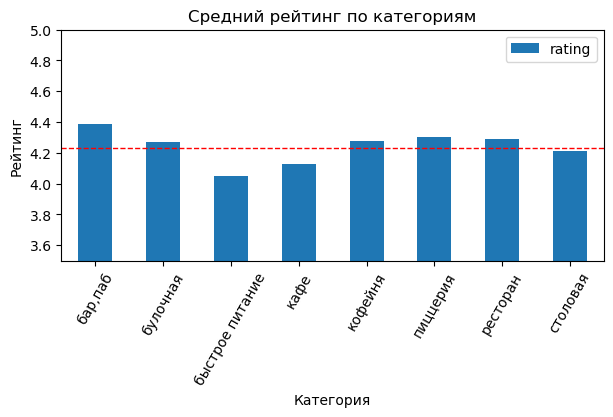

In [202]:
# Строим график столбчатой диаграммы
grouped = df.groupby('category')['rating'].mean()
grouped.plot(kind='bar',
               title=f'Средний рейтинг по категориям',
               legend=True,
               ylabel='Рейтинг',
               xlabel='Категория',
               rot=60,
               figsize=(7, 3))

# Рассчитываем среднее значение рейтинга
mean_rating_share = df['rating'].mean()

plt.ylim(3.5, 5)

# Наносим на график линию с средним значением рейтинга
plt.axhline(mean_rating_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Средний рейтинг {round(mean_rating_share,4)}')
plt.show()

На основании полученных даных можно увидеть, что средний рейтинг по категориям имеет малую вариативность. Выше всего пользователями оцениваются бары и пабы, а заведения быстрого питания и кафе имеют наименьший средний рейтинг. Обе эти категории находятся ниже среднего показателя рейтинга заведений в целом по Москве.

### 3.6 Исследуем корреляцию рейтинга заведений с прочими данными

Визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведение круглосуточным.

In [205]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'middle_avg_bill', 'is_24_7', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной churn')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'middle_avg_bill', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной churn


,rating
middle_avg_bill,0.218416
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


На основании имеющейся информации мы можем сделать вывод, что корреляция присутствует, но не слишком выражена. Наибольшая корреляция рейтинга наблюдается со средним чеком (`0.21`), районом Москвы (`0.20`) и категорией заведения (`0.19`). Для остальных признаков коэффициент корреляции не превышает `0.15`.

Важно помнить, что `phi_k` сообщает только о наличии связи между данными. На сам характер связи коэффициент `phi_k` не указывает, поэтому после получения коэффициента следует продолжить анализ. На данном этапе мы можем сделать вывод, что уровень цен в заведении является важным, но не определяющим фактором при выставлении оценки пользователем.

Перед тем как перейти к дальнейшему анализу, визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn:

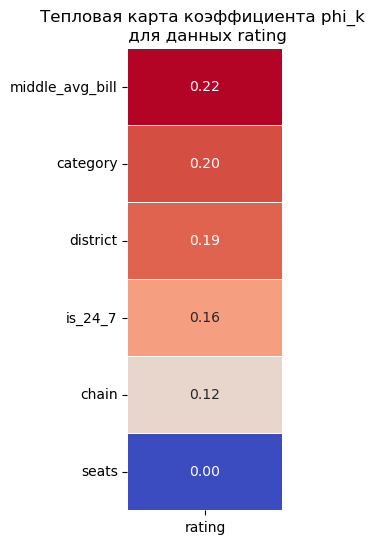

In [207]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')

# Выводим график
plt.show()

### 3.7 Исследуем топ-15 популярных сетей в Москве

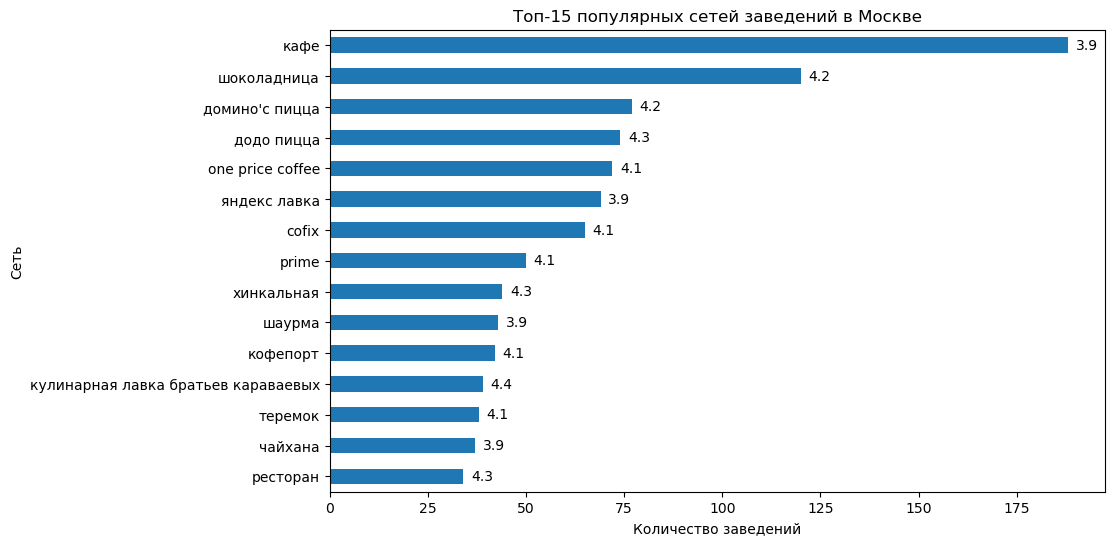

In [209]:
# Группируем по названию сети, считаем количество заведений и средний рейтинг
top_chains = (
    df.groupby('name')
    .agg(count=('name', 'count'), avg_rating=('rating', 'mean'), category=('category', 'first'))
    .sort_values(by='count', ascending=False)
    .head(15)
)

# Визуализация
fig, ax = plt.subplots(figsize=(10, 6))
top_chains[['count']].plot(kind='barh', ax=ax, legend=False)
ax.set_title('Топ-15 популярных сетей заведений в Москве')
ax.set_xlabel('Количество заведений')
ax.set_ylabel('Сеть')
plt.gca().invert_yaxis()

# Добавляем подписи среднего рейтинга
for i, (count, avg_rating) in enumerate(zip(top_chains['count'], top_chains['avg_rating'])):
    ax.text(count + 2, i, f'{avg_rating:.1f}', va='center')

plt.show()

In [210]:
top_chains = (
    df.groupby('name')
    .agg(count=('name', 'count'), avg_rating=('rating', 'mean'), category=('category', 'first'))
    .sort_values(by='count', ascending=False)
    .head(15)
)
print(top_chains)

                                     count  avg_rating         category
name                                                                   
кафе                                   188    3.884574             кафе
шоколадница                            120    4.177500          кофейня
домино'с пицца                          77    4.171428         пиццерия
додо пицца                              74    4.286487         пиццерия
one price coffee                        72    4.069445          кофейня
яндекс лавка                            69    3.872464         ресторан
cofix                                   65    4.075385          кофейня
prime                                   50    4.116000         ресторан
хинкальная                              44    4.322727  быстрое питание
шаурма                                  43    3.909302  быстрое питание
кофепорт                                42    4.147619          кофейня
кулинарная лавка братьев караваевых     39    4.394872          

При группировке мы получили наибольшее число заведений с названием "кафе". Возможно, у этих заведений не было внесено корректное название, поэтому мы не будем учитывать данную выборку при анализе. Отфильтруем данные:

In [212]:
# Исключаем "кафе"
top_chains = top_chains[~top_chains.index.str.contains('кафе', case=False, na=False)]

print(top_chains)

                                     count  avg_rating         category
name                                                                   
шоколадница                            120    4.177500          кофейня
домино'с пицца                          77    4.171428         пиццерия
додо пицца                              74    4.286487         пиццерия
one price coffee                        72    4.069445          кофейня
яндекс лавка                            69    3.872464         ресторан
cofix                                   65    4.075385          кофейня
prime                                   50    4.116000         ресторан
хинкальная                              44    4.322727  быстрое питание
шаурма                                  43    3.909302  быстрое питание
кофепорт                                42    4.147619          кофейня
кулинарная лавка братьев караваевых     39    4.394872             кафе
теремок                                 38    4.123684         р

В топе сетей находятся заведения категорий "кофейня" и "пиццерия". Данные категории занимают 4 верхних строки рейтинга.

### 3.8 Изучаем вариацию среднего чека заведения в зависимости от района Москвы

Проанализируем цены в центральном административном округе и других, чтобы увидеть, как удалённость от центра влияет на цены в заведениях

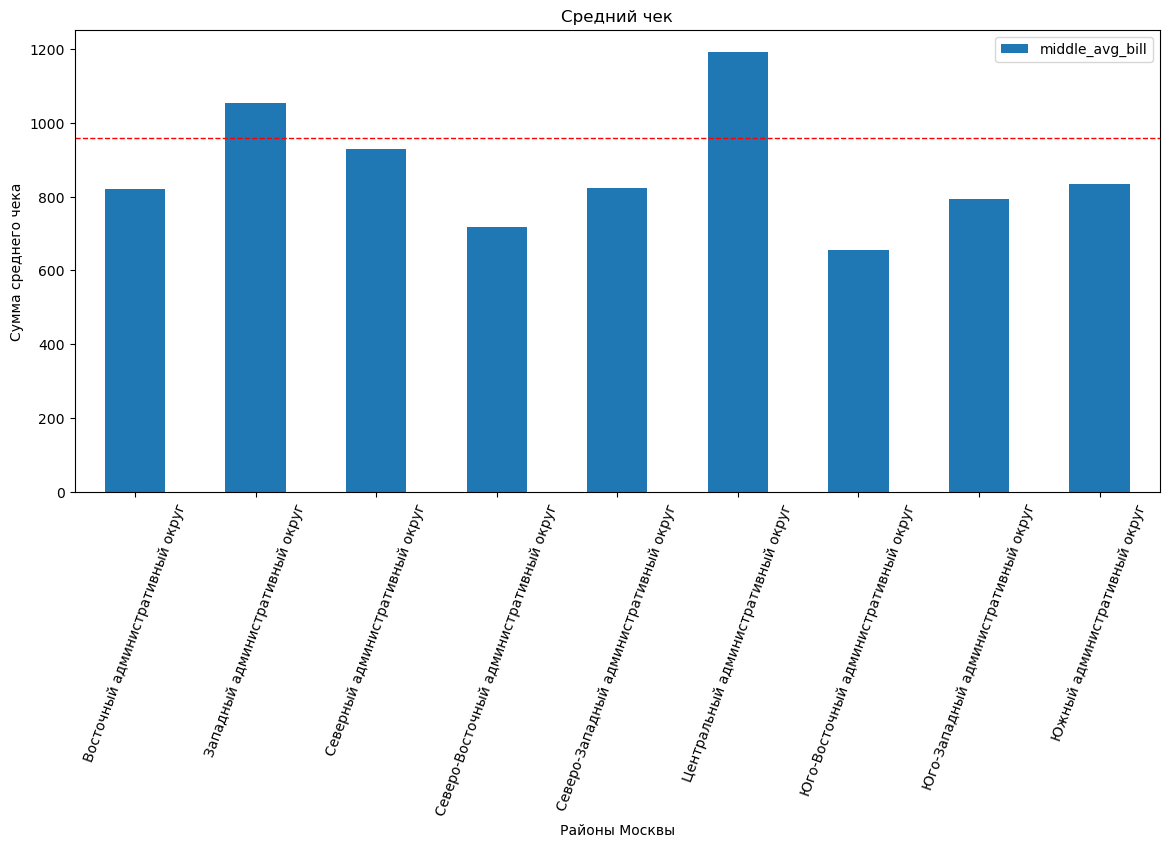

In [215]:
df_not_0 = df[df['middle_avg_bill'] > 0]
# Строим график столбчатой диаграммы
grouped = df_not_0.groupby('district')['middle_avg_bill'].mean()
grouped.plot(kind='bar',
               title=f'Средний чек',
               legend=True,
               ylabel='Сумма среднего чека',
               xlabel='Районы Москвы',
               rot=70,
               figsize=(14, 6))

# Рассчитываем среднее значение рейтинга
mean_middle_avg_bill = df_not_0['middle_avg_bill'].mean()

# Наносим на график линию с средним значением рейтинга
plt.axhline(mean_middle_avg_bill, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Средний чек {round(mean_middle_avg_bill,4)}')
plt.show()

Наиболее высоким средним ценником выделяется Центральный административный округ, следом за ним идет Западный административный округ. Эти два округа имеют показатель выше среднего значения по Москве в целом. Самый низкий средний чек - Юго-Восточный административный округ.

## 4. Итоговые выводы

В ходе исследования была проведена работа с базой данных, содержащей информацию о 8 тысячах заведений общественного питания Москвы. Основными исследуемыми показателями стали: категория заведений, районы расположения, режим работы, количество посадочных мест, рейтинг и величина среднего чека.

Наибольшую долю в массиве открытых заведений имеют `кафе`(`2376 заведений`) и `рестораны`(`2042`), однако идущие за ними категории `кофейня`(`1413`) и `бар, паб`(`764`) имеют в среднем более высокие рейтинги (`4.28` и `4.39` соответственно при среднем `4.20`). Это можно учитывать при планировании потенциального открытия и обратить внимание на данные типы заведений. 

Также стоит учитывать не только взаимосвязь рейтинга с категорией заведения (коэффициент корреляции `0.2`), но и территориальное расположение (коэффициент корреляции `0.19`). Категориальное распределение, ценовая политика, обилие сетевых и несетевых заведений - всё это варьируется от района к району.